In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

zirwaomar_hbl_data_path = kagglehub.dataset_download('zirwaomar/hbl-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_path = '/kaggle/input/hbl-data/Enhanced_Dummy_HBL_Data.xlsx'
data=pd.read_excel(data_path)
data

,Region,Subregion,Area,Branch,Account Type,Transaction To,Credit,Debit
0,Lahore,Lahore1,Model Town,MT Branch 1,Current,Mezan,9.664017e+06,0.000000e+00
1,Lahore,Lahore3,Model Town,MT Branch 1,Business,Lahore4,0.000000e+00,1.567210e+06
2,Lahore,Lahore4,Model Town,MT Branch 1,Business,Lahore4,1.707974e+06,0.000000e+00
3,Lahore,Lahore1,Model Town,MT Branch 1,Current,Lahore3,0.000000e+00,4.988621e+06
4,Lahore,Lahore3,Model Town,MT Branch 1,Business,MCB,9.955057e+06,0.000000e+00
...,...,...,...,...,...,...,...,...
83,Karachi,Karachi2,North Nazimabad,Nazimabad Branch 2,Current,Karachi3,4.546101e+06,0.000000e+00
84,Karachi,Karachi3,North Nazimabad,Nazimabad Branch 2,Current,Askari,0.000000e+00,3.528810e+06
85,Karachi,Karachi4,North Nazimabad,Nazimabad Branch 2,Current,Alfalah,7.396254e+06,0.000000e+00
86,Karachi,Karachi3,North Nazimabad,Nazimabad Branch 2,Business,Karachi3,2.961133e+06,0.000000e+00


In [ ]:

data.head()

,Region,Subregion,Area,Branch,Account Type,Transaction To,Credit,Debit
0,Lahore,Lahore1,Model Town,MT Branch 1,Current,Mezan,9.664017e+06,0.000000e+00
1,Lahore,Lahore3,Model Town,MT Branch 1,Business,Lahore4,0.000000e+00,1.567210e+06
2,Lahore,Lahore4,Model Town,MT Branch 1,Business,Lahore4,1.707974e+06,0.000000e+00
3,Lahore,Lahore1,Model Town,MT Branch 1,Current,Lahore3,0.000000e+00,4.988621e+06
4,Lahore,Lahore3,Model Town,MT Branch 1,Business,MCB,9.955057e+06,0.000000e+00


In [ ]:
data.size

704

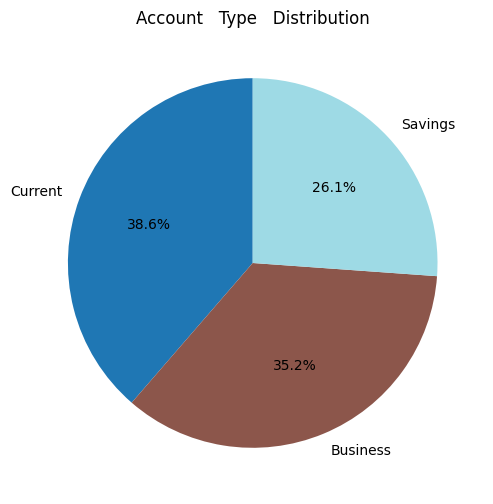

In [ ]:
# Task 1: Account Type Distribution
account_type_counts = data['Account Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
account_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Account   Type   Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()

This pie chart visualizes the proportion of different account types in the dataset.
By understanding the share of each account type, you can identify which account types are most popular or prevalent in the data. For example, a dominance of one type may indicate customer preferences or organizational focus.

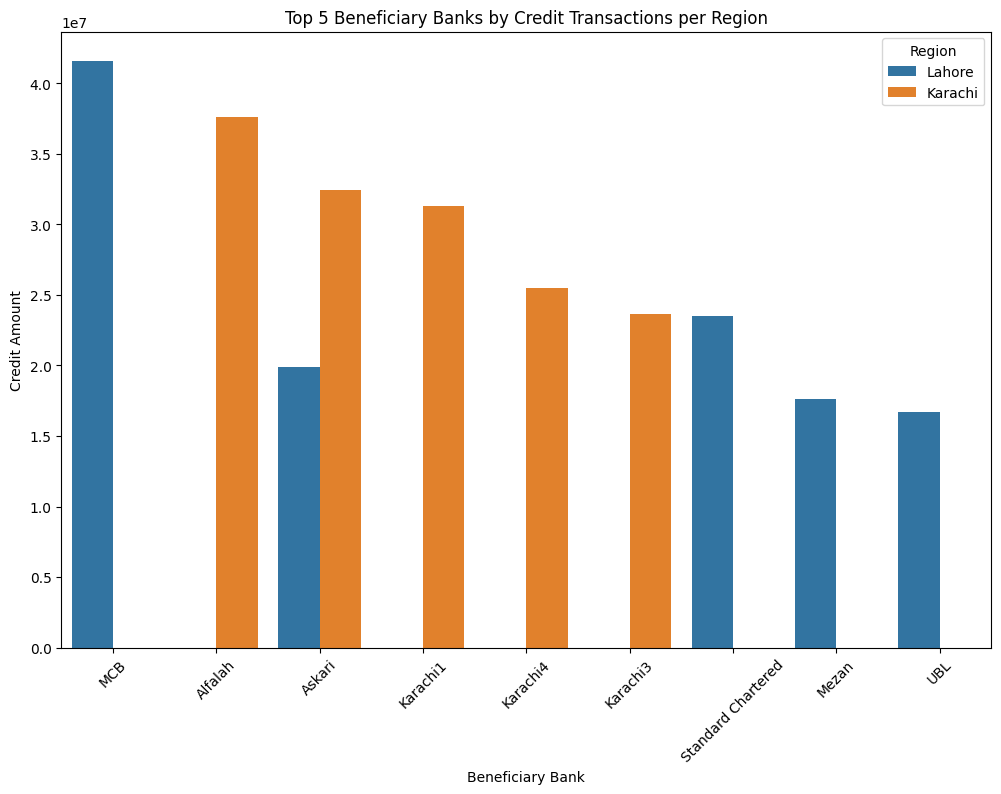

In [ ]:
# Task 2: Transaction Flow by Beneficiary Bank
# Group data by Region and Transaction To, summing the Credit column
top_banks = (data.groupby(['Region', 'Transaction To'])['Credit']
             .sum()
             .reset_index()
             .sort_values(by='Credit', ascending=False)
             .groupby('Region')
             .head(5))

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_banks, x='Transaction To', y='Credit', hue='Region')
plt.title('Top 5 Beneficiary Banks by Credit Transactions per Region')
plt.xlabel('Beneficiary Bank')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

Purpose: Displays the top 5 beneficiary banks in terms of credit transactions for each region.
This chart helps identify key banks that handle the most credit transactions in different regions. It can uncover regional banking trends or potential hubs of financial activity, which might be useful for decision-making in targeted banking strategies.

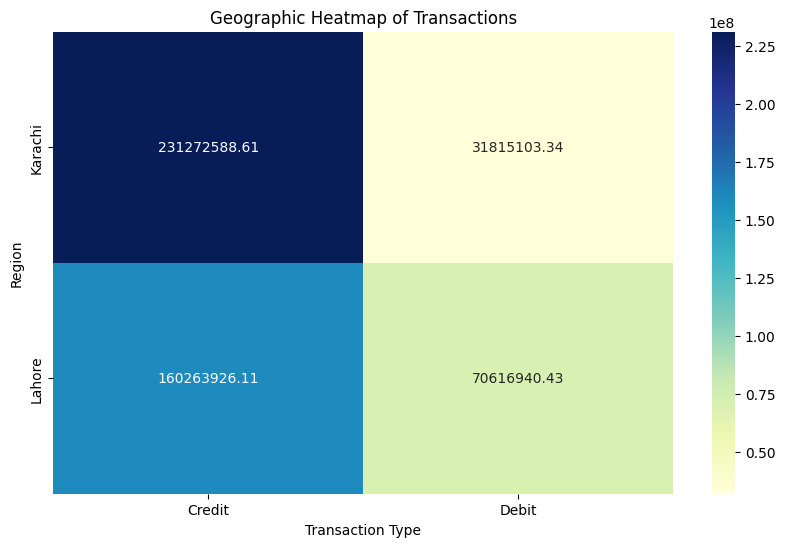

In [ ]:
# Task 3: Geographic Heatmap of Transactions
# Aggregate Credit and Debit columns by Region
region_agg = data.groupby('Region')[['Credit', 'Debit']].sum().reset_index()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(region_agg.set_index('Region'), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Geographic Heatmap of Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Region')
plt.show()

Purpose: Shows transaction intensities (credit and debit amounts) across different regions.
A heatmap provides a geographical perspective, making it easy to see which regions have the highest or lowest transaction activities. This can inform decisions about resource allocation, regional market focus, or potential risk areas.

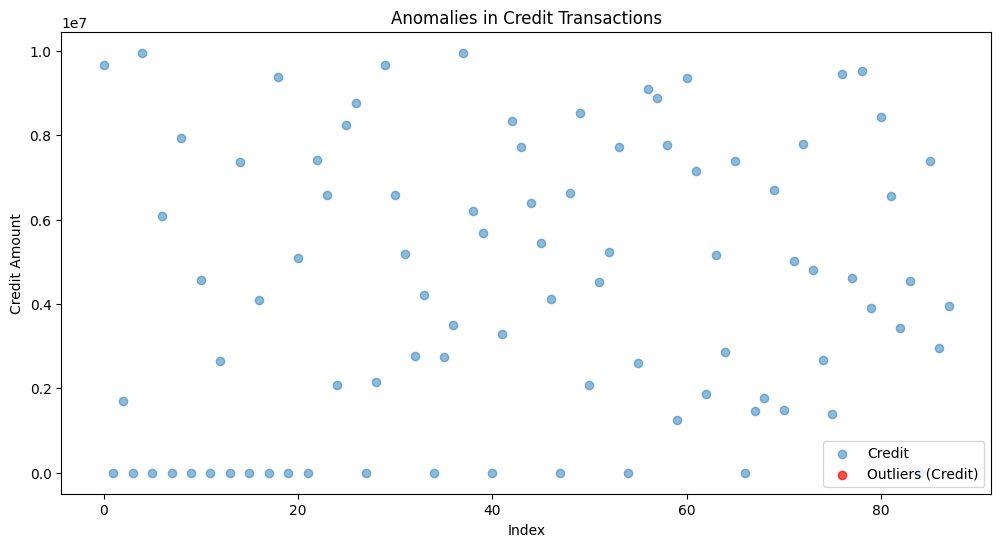

In [ ]:
# Task 4: Anomalies in Transactions
# Calculate Z-scores for Credit and Debit columns
data['Credit_Z'] = (data['Credit'] - data['Credit'].mean()) / data['Credit'].std()
data['Debit_Z'] = (data['Debit'] - data['Debit'].mean()) / data['Debit'].std()

outliers_credit = data[data['Credit_Z'].abs() > 3]
outliers_debit = data[data['Debit_Z'].abs() > 3]

# Create SCATTER PLOT
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['Credit'], label='Credit', alpha=0.5)
plt.scatter(outliers_credit.index, outliers_credit['Credit'], color='red', label='Outliers (Credit)', alpha=0.7)
plt.title('Anomalies in Credit Transactions')
plt.xlabel('Index')
plt.ylabel('Credit Amount')
plt.legend()
plt.show()

Purpose: Identifies outliers in the credit and debit transactions based on Z-scores.
Outliers often represent unusual behavior or potential errors. By isolating these, you can investigate fraud, transaction errors, or extraordinary activities, enhancing data integrity and risk management.

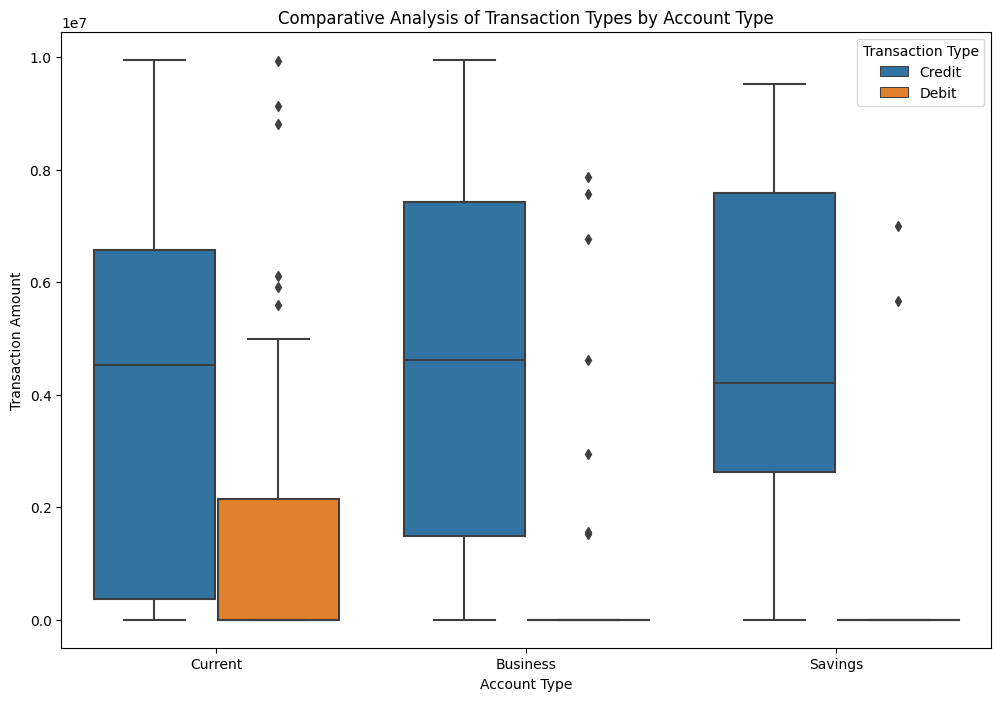

In [ ]:
# Task 5: Comparative Analysis of Transaction Types
# Box plot comparing Credit and Debit distributions by Account Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.melt(id_vars='Account Type', value_vars=['Credit', 'Debit']),
            x='Account Type', y='value', hue='variable')
plt.title('Comparative Analysis of Transaction Types by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()


Purpose: Compares the distribution of credit and debit transaction amounts across different account types.
Box plots show the central tendency (median) and spread (interquartile range) of transactions for each account type. It helps pinpoint which account types have higher variability or larger transactions, aiding in customer segmentation and strategy.

In [ ]:
#Task 6 Time-Based Analysis (if applicable)
if 'Time' in data.columns:
    data['Time'] = pd.to_datetime(data['Time'])
    data = data.dropna(subset=['Time'])
    if not data.empty:
        data.set_index('Time', inplace=True)
        #Create a LINE CHART
        time_series = data.resample('D')[['Credit', 'Debit']].sum().reset_index()
        if not time_series.empty:
            plt.figure(figsize=(12, 6))
            plt.plot(time_series['Time'], time_series['Credit'], label='Credit', color='blue')
            plt.plot(time_series['Time'], time_series['Debit'], label='Debit', color='red')
            plt.title("Transaction Trends Over Time")
            plt.xlabel("Time")
            plt.ylabel("Transaction Amount")
            plt.legend()
            plt.show()
        else:
            print("Time series data is empty after processing.")
    else:
        print("No valid time data found in the dataset.")
else:
    print("The 'Time' column is not available in the dataset.")



The 'Time' column is not available in the dataset.


Purpose: Tracks trends in credit and debit transactions over time.
Observing transaction trends over time can reveal seasonality, growth patterns, or unusual spikes/dips in activity. These insights can inform operational planning or promotional campaigns aligned with customer behavior.

<Figure size 1000x600 with 0 Axes>

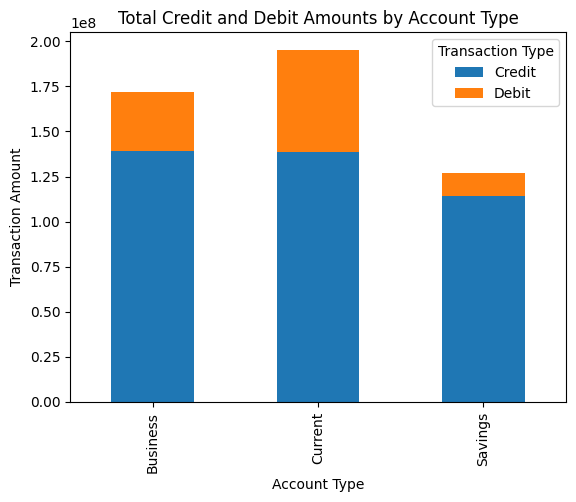

In [ ]:
# Task 7.Customer Insights
#Assumed Customer Type as Account Type
customer_transactions = data.groupby('Account Type')[['Credit', 'Debit']].sum().reset_index()

# Created a STACKED BAR CHART
plt.figure(figsize=(10, 6))
customer_transactions.set_index('Account Type').plot(kind='bar', stacked=True)
plt.title('Total Credit and Debit Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()


Purpose: Displays total credit and debit amounts for each customer type.
This chart helps understand customer type dynamics—e.g., which customer groups contribute most to credit or debit transactions. It can guide tailored marketing efforts or highlight reliance on specific customer segments.
